In [ ]:
# IMPORT TENSORFLOW
import tensorflow as tf
print(tf.__version__)

2.6.0


In [ ]:
# CEK NAMA GPU
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# CEK NAMA TPU
# HANYA DI-RUNNING KETIKA MENGGUNAKAN TPU
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

## Load Images and Make Pickle

In [ ]:
!wget --no-check-certificate \
  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2021-10-27 03:53:51--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.85.0.109, 2a02:26f0:11e:4b5::e59, 2a02:26f0:11e:4bc::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.85.0.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M   147MB/s    in 5.4s    

2021-10-27 03:53:56 (146 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [ ]:
# EXTRACT ZIP FILE
import zipfile
local_zip = '/content/kagglecatsanddogs_3367a.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# CEK DIRECTORY PADA FOLDER PETIMAGES
import os
os.listdir('/content/PetImages')

['Cat', 'Dog']

In [ ]:
# PANGGIL NAMA DIRECTORY UTAMA
DIRECTORY = "PetImages"

# PANGGIL SUB DIRECTORY ATAU SUB FOLDER (KATEGORI)
CATEGORIES = ["Cat", "Dog"]

In [ ]:
# CEK KEMBALI SUB DIRECTORY
CATEGORIES

['Cat', 'Dog']

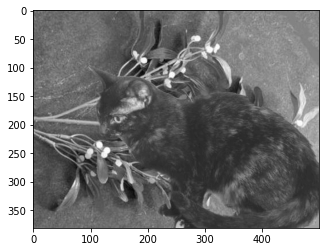

Cat


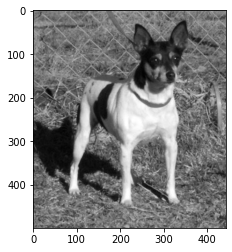

Dog


In [ ]:
# CEK ISI GAMBAR PERTAMA
import cv2
import matplotlib.pyplot as plt

for kategori in CATEGORIES:
    # MASUK KE DALAM DIRECTORY PETIMAGES > CAT KEMUDIAN PETIMAGES > DOG
    masukDirektori = os.path.join(DIRECTORY, kategori)

    """
    TES APAKAH FILE DIRECTORY DAPAT TERBACA DENGAN BAIK.
    TAMPILKAN SALAH SATU GAMBAR PADA SUB DIRECTORY.
    DAN DENGAN WARNA GREYSCALE.
    """

    for gambar in os.listdir(masukDirektori):
        gambarArray = cv2.imread(os.path.join(masukDirektori,gambar), cv2.IMREAD_GRAYSCALE)
        plt.imshow(gambarArray, cmap="gray")
        plt.show()
        # GUNAKAN BREAK UNTUK LOADING HANYA 1 GAMBAR
        break
    print(kategori)

In [ ]:
# VARIABEL DENGAN TIPE DATA LIST KOSONG UNTUK MENAMPUNG DATA GAMBAR
data = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        # PEMBERIAN LABEL KE SETIAP GAMBAR
        try:
          # RESIZE UNTUK NORMALISASI UKURAN DATA.
          # GAMBAR DIPADATKAN MENJADI PERSEGI, DISINI MEMAKAI UKURAN 60px x 60px.
          new_arr = cv2.resize(arr, (60, 60))
          # APPEND DIGUNAKAN UNTUK MENGISI NILAI GAMBAR DAN LABEL KE DALAM VARIABEL DATA
          data.append([new_arr, label])

        except Exception as e:
          print(str(e))

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion faile

In [ ]:
# TAMPILKAN ISI VARIABEL DATA
data

[[array([[132, 107, 106, ..., 135, 133, 131],
         [ 99,  99, 122, ..., 133, 131, 132],
         [138, 112,  94, ..., 134, 141, 140],
         ...,
         [ 98,  95, 102, ...,  64,  87, 162],
         [104,  99, 100, ..., 102, 146, 163],
         [104, 107, 105, ..., 123, 160, 160]], dtype=uint8), 0],
 [array([[ 41,  42,  45, ...,  42,  43,  43],
         [ 49,  43,  47, ...,  44,  41,  41],
         [ 49,  50,  51, ...,  49,  49,  46],
         ...,
         [ 88,  97,  84, ...,  87,  91,  92],
         [ 97, 100, 109, ..., 100, 107,  87],
         [103,  95, 104, ..., 105, 104,  93]], dtype=uint8), 0],
 [array([[108, 103, 135, ...,  50,  48,  46],
         [144,  66,  49, ...,  54,  53,  55],
         [ 50,  24,  32, ...,  67,  55,  57],
         ...,
         [201,  91, 210, ..., 149, 211, 221],
         [178, 202, 192, ..., 159, 165, 155],
         [192, 195, 204, ..., 148, 153, 159]], dtype=uint8), 0],
 [array([[224, 231, 213, ..., 107, 102,  90],
         [223, 234, 237, ..

In [ ]:
data[0][1]

0

In [ ]:
import random
"""
MENGACAK DATA.
CLASSIFIER AKAN BELAJAR MEMBACA GAMBAR ANJING, KUCING, DST.
DATA YANG AKAN DITRAINING PERLU DIACAK.
"""
random.shuffle(data)

In [ ]:
"""
VARIABEL X DAN Y DIGUNAKAN UNTUK MENYIMPAN LABEL DAN FEATURE.
FEATURE BERISI TENSOR GAMBAR.
"""
X = []
y = []

In [ ]:
for features, label in data:
  X.append(features)
  y.append(label)

In [ ]:
import numpy as np

X = np.array(X)
y = np.array(y)

In [ ]:
X

array([[[150, 150, 150, ..., 102,  98,  97],
        [151, 151, 151, ..., 105, 101,  98],
        [153, 153, 152, ..., 105, 103, 100],
        ...,
        [ 84,  78,  80, ...,  91,  69,  65],
        [ 77,  59,  44, ...,  80,  72,  67],
        [ 31,  34,  32, ...,  76,  63,  60]],

       [[230, 236, 178, ..., 231, 231, 230],
        [231, 237, 207, ..., 230, 230, 229],
        [232, 240, 217, ..., 232, 232, 231],
        ...,
        [184, 192, 187, ..., 194, 190, 189],
        [181, 178, 172, ..., 184, 187, 185],
        [172, 170, 164, ..., 166, 186, 184]],

       [[ 92, 128, 179, ..., 233, 236, 235],
        [113, 140, 175, ..., 232, 234, 234],
        [110, 140, 170, ..., 230, 231, 231],
        ...,
        [ 41,  38,  42, ...,  73,  85,  83],
        [ 41,  31,  38, ...,  85,  79,  82],
        [ 24,  26,  27, ...,  92,  79,  94]],

       ...,

       [[ 58,  64,  97, ...,  41,  49,  63],
        [ 79,  60,  72, ...,  66,  72,  62],
        [ 87, 107,  90, ...,  73,  71,  66

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
# LIBRARY PICKLE ADALAH DEPENDENSI YANG BERFUNGSI MENYIMPAN FILE UNTUK MODEL DATA TRAINING
import pickle

In [ ]:
"""
wb ARTINYA WRITING ATAU OVERWRITE.
pickle.dump() MEMERLUKAN 2 ARGUMEN, ARRAY YANG INGIN DICONVERT
DAN NAMA FILE PICKLE YANG INGIN DITULIS.
"""
pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

## Training

In [ ]:
# rb ARTINYA READING MODE
X = pickle.load(open('X.pkl', 'rb'))
y = pickle.load(open('y.pkl', 'rb'))

In [ ]:
X

array([[[150, 150, 150, ..., 102,  98,  97],
        [151, 151, 151, ..., 105, 101,  98],
        [153, 153, 152, ..., 105, 103, 100],
        ...,
        [ 84,  78,  80, ...,  91,  69,  65],
        [ 77,  59,  44, ...,  80,  72,  67],
        [ 31,  34,  32, ...,  76,  63,  60]],

       [[230, 236, 178, ..., 231, 231, 230],
        [231, 237, 207, ..., 230, 230, 229],
        [232, 240, 217, ..., 232, 232, 231],
        ...,
        [184, 192, 187, ..., 194, 190, 189],
        [181, 178, 172, ..., 184, 187, 185],
        [172, 170, 164, ..., 166, 186, 184]],

       [[ 92, 128, 179, ..., 233, 236, 235],
        [113, 140, 175, ..., 232, 234, 234],
        [110, 140, 170, ..., 230, 231, 231],
        ...,
        [ 41,  38,  42, ...,  73,  85,  83],
        [ 41,  31,  38, ...,  85,  79,  82],
        [ 24,  26,  27, ...,  92,  79,  94]],

       ...,

       [[ 58,  64,  97, ...,  41,  49,  63],
        [ 79,  60,  72, ...,  66,  72,  62],
        [ 87, 107,  90, ...,  73,  71,  66

In [ ]:
X = X/255

In [ ]:
X

array([[[0.58823529, 0.58823529, 0.58823529, ..., 0.4       ,
         0.38431373, 0.38039216],
        [0.59215686, 0.59215686, 0.59215686, ..., 0.41176471,
         0.39607843, 0.38431373],
        [0.6       , 0.6       , 0.59607843, ..., 0.41176471,
         0.40392157, 0.39215686],
        ...,
        [0.32941176, 0.30588235, 0.31372549, ..., 0.35686275,
         0.27058824, 0.25490196],
        [0.30196078, 0.23137255, 0.17254902, ..., 0.31372549,
         0.28235294, 0.2627451 ],
        [0.12156863, 0.13333333, 0.1254902 , ..., 0.29803922,
         0.24705882, 0.23529412]],

       [[0.90196078, 0.9254902 , 0.69803922, ..., 0.90588235,
         0.90588235, 0.90196078],
        [0.90588235, 0.92941176, 0.81176471, ..., 0.90196078,
         0.90196078, 0.89803922],
        [0.90980392, 0.94117647, 0.85098039, ..., 0.90980392,
         0.90980392, 0.90588235],
        ...,
        [0.72156863, 0.75294118, 0.73333333, ..., 0.76078431,
         0.74509804, 0.74117647],
        [0.7

In [ ]:
"""
RESHAPE DIGUNAKAN UNTUK MEMBERIKAN BENTUK BARU KE ARRAY TANPA MENGUBAH DATANYA.
-1,1 MEMBENTUK 1 KOLOM DENGAN 1 BARIS.
"""
X = X.reshape(-1, 60, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
# UNTUK MEMULAI NEURAL NETWORK MODEL DENGAN KERAS DIGUNAKAN FUNGSI Sequential()
model = Sequential()

"""
Conv2D ADALAH 2D CONVOLUTION LAYER.
LAYER INI MEMBUAT SEBUAH KERNEL AGAR DAPAT MEMPRODUKSI KELUARAN DARI LAYER INPUT.
DIREKOMENDASIKAN MEMULAI FILTER PADA RENTANG (32, 64, 128).
BISA DITINGKATKAN KE (256, 512, 1024) UNTUK LAYER YANG LEBIH DALAM.

RELU SINGKATAN DARI RECTIFIED LINEAR UNIT, YAITU FUNGSI AKTIVASI YANG PALING UMUM
DIGUNAKAN DALAM NEURAL NETWORK, TERUTAMA CNN.

MAXPOOLING ADALAH STRATEGI DOWNSAMPLING DALAM CONVOLUTIONAL NEURAL NETWORKS.
DIGUNAKAN FILTER 2x2.
TAHAP DOWNSAMPLING MERUPAKAN PROSES UNTUK MENURUNKAN JUMLAH PIKSEL,
MEMPERTAHANKAN INFORMASI DARI CITRA NAMUN MENGHASILKAN UKURAN CITRA YANG LEBIH KECIL.
"""

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

# MENGGUNAKAN 2 LAYER CONVOLUTION

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

# FLATTEN AKAN MERATAKAN SEMUA NILAI TENSOR MENJADI TENSOR 1D
model.add(Flatten())

"""
DENSE LAYER ADALAH LAPISAN YANG TERHUBUNG PENUH.
SEMUA NEURON DALAM LAPISAN TERHUBUNG DENGAN NEURON DALAM LAPISAN BERIKUTNYA.
"""
model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))
  

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
"""
KITA PERLU MELEWATI DATASET BEBERAPA KALI KE JARINGAN SARAF YANG SAMA.
TIDAK ADA KETENTUAN MENGENAI JUMLAH EPOCHS, NILAINYA TERGANTUNG ISI DATASET.
APABILA AKURASI MASIH RENDAH, NAIKKAN EPOCHS-NYA.
"""
model.fit(X, y, epochs=5, validation_split=0.1)

Epoch 1/5
702/702 [==============================] - 39s 13ms/step - loss: 0.5949 - accuracy: 0.6753 - val_loss: 0.5503 - val_accuracy: 0.7255
Epoch 2/5
702/702 [==============================] - 9s 12ms/step - loss: 0.4896 - accuracy: 0.7636 - val_loss: 0.4857 - val_accuracy: 0.7635
Epoch 3/5
702/702 [==============================] - 9s 12ms/step - loss: 0.4353 - accuracy: 0.7964 - val_loss: 0.4693 - val_accuracy: 0.7711
Epoch 4/5
702/702 [==============================] - 9s 12ms/step - loss: 0.3825 - accuracy: 0.8272 - val_loss: 0.4459 - val_accuracy: 0.7944
Epoch 5/5
702/702 [==============================] - 9s 12ms/step - loss: 0.3201 - accuracy: 0.8604 - val_loss: 0.4296 - val_accuracy: 0.8032


In [ ]:
# MENYIMPAN MODEL
model.save('models/catvsdog.model')

INFO:tensorflow:Assets written to: models/catvsdog.model/assets


## Prediction

In [ ]:
import keras
CATEGORIES = ['Cat', 'Dog']

def image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(img, (60, 60))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, 60, 60, 1)
    return new_arr

# MENGAMBIL MODEL YANG TELAH DITRAINING SEBELUMNYA
model = keras.models.load_model('models/catvsdog.model')

In [ ]:
prediction = model.predict([image('prediksi/kucing3.jpg')])
print(CATEGORIES[prediction.argmax()])

Cat
